In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKXJXOB/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKXJXOB/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteKXJXOB/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 110s 282ms/step - loss: 0.5319 - accuracy: 0.7314 - val_loss: 0.4668 - val_accuracy: 0.8053
Epoch 2/10
391/391 [==============================] - 110s 281ms/step - loss: 0.4044 - accuracy: 0.8239 - val_loss: 0.4026 - val_accuracy: 0.8345
Epoch 3/10
391/391 [==============================] - 110s 282ms/step - loss: 0.4037 - accuracy: 0.8244 - val_loss: 0.5235 - val_accuracy: 0.7412
Epoch 4/10
391/391 [==============================] - 109s 279ms/step - loss: 0.3692 - accuracy: 0.8435 - val_loss: 0.4931 - val_accuracy: 0.7942
Epoch 5/10
391/391 [==============================] - 108s 275ms/step - loss: 0.2603 - accuracy: 0.8991 - val_loss: 0.3584 - val_accuracy: 0.8511
Epoch 6/10
391/391 [==============================] - 107s 273ms/step - loss: 0.1845 - accuracy: 0.9334 - val_loss: 0.3745 - val_accuracy: 0.8583
Epoch 7/10
391/391 [==============================] - 105s 269ms/step - loss: 0.1394 - accuracy: 0.9510 - val_loss: 0.3797 -

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

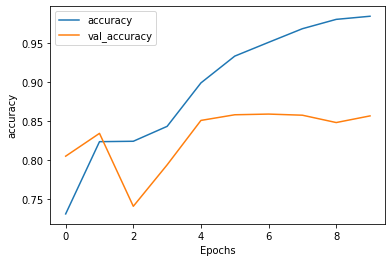

In [11]:
plot_graphs(history, 'accuracy')

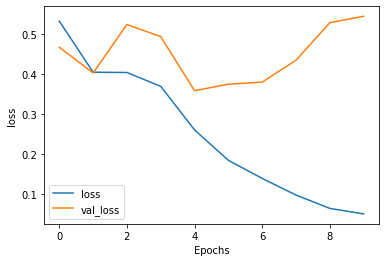

In [12]:
plot_graphs(history, 'loss')

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 25s 63ms/step - loss: 0.4424 - accuracy: 0.7843 - val_loss: 0.3102 - val_accuracy: 0.8779
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2214 - accuracy: 0.9176 - val_loss: 0.2992 - val_accuracy: 0.8795
Epoch 3/10
391/391 [==============================] - 15s 37ms/step - loss: 0.1682 - accuracy: 0.9388 - val_loss: 0.3355 - val_accuracy: 0.8722
Epoch 4/10
391/391 [==============================] - 14s 37ms/step - loss: 0.1362 - accuracy: 0.9511 - val_loss: 0.3747 - val_accuracy: 0.8695
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 0.1103 - accuracy: 0.9610 - val_loss: 0.4360 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0935 - accuracy: 0.9683 - val_loss: 0.4980 - val_accuracy: 0.8559
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 0.0713 - accuracy: 0.9775 - val_loss: 0.5694 - val_accuracy:

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

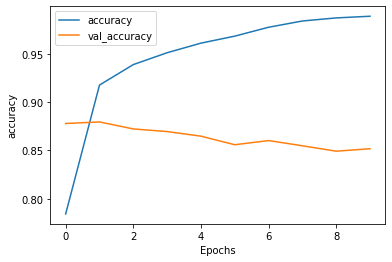

In [18]:
plot_graphs(history, 'accuracy')

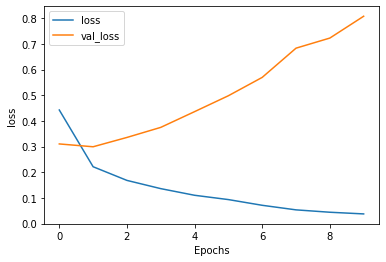

In [19]:
plot_graphs(history, 'loss')